In [2]:
import pandas as pd
import pandas as np

In [146]:
travel_data=pd.read_csv('TravelData.csv')
users_data=pd.read_csv('TravelDataDemos.csv')
#print(travel_data.head())
#users_data.head()

In [7]:
travel_data.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel
0,9558,1,2016-03-12 22:18:34,5.786,MOBILE,7,0,0,0,0
1,9558,1,2016-03-13 05:25:49,65.725,MOBILE,7,0,0,0,0
2,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,0,0,0,0
3,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,0,0,0,0
4,1,3,2015-08-07 19:16:59,120.000,FIXED,7,0,0,0,17


In [8]:
users_data.head()

,UserID,SPSS_Regio5,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
0,9558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,5.0,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
3,2,3.0,3.0,2.0,2.0,47.0,2.0,7.0,0.0,2.0,6.0,4.0
4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# What is the effect of CICs on booking conversions?

In [20]:
travel_data.shape

(2456414, 10)

In [23]:
travel_data.isna().sum()

UserID               0
PurchaseID           0
TIMESPSS             0
Duration        141065
DEVICE_TYPE          0
type_touch           0
purchase_own         0
purchase_any         0
MobilePanel          0
FixedPanel           0
dtype: int64

In [54]:
users_data.isna().sum()

UserID                              0
SPSS_Regio5                      1603
RESP_GEM_GROOTTE                 1603
BAS_huishoudgrootte              1603
GenderID                         1603
Age                              1603
BAS_werkzaamheid_resp            1603
BAS_bruto_jaarinkomen            1603
afg_kinderen_huishouden          1603
AFG_sk2015                       1603
BAS_voltooide_opleiding8_resp    2031
SPSS_Lifestage                   1603
dtype: int64

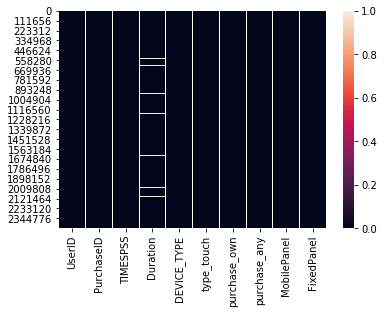

In [25]:
import seaborn as sn
from matplotlib import pyplot as py
sn.heatmap(travel_data.isna())

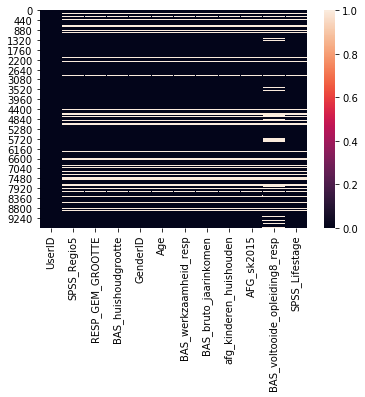

In [55]:
import seaborn as sn
from matplotlib import pyplot as py
sn.heatmap(users_data.isna())

<BarContainer object of 2 artists>

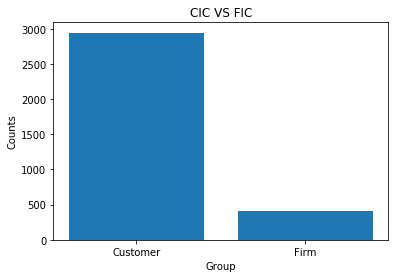

In [53]:
#travel_data=pd.read_csv('TravelData.csv')
#users_data=pd.read_csv('TravelDataDemos.csv')
travel_data_converg=travel_data[(travel_data['purchase_any']==1) & (travel_data['type_touch'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]))]
count_customer=len(travel_data_converg['UserID'].unique())
travel_data_Nconverg=travel_data[(travel_data['purchase_any']==1) & (travel_data['type_touch'].isin([18,19,20,21,22]))]
count_firm=len(travel_data_Nconverg['UserID'].unique())
X=['Customer','Firm']
Y=[count_customer,count_firm]
from matplotlib import pyplot as plt
plt.title('CIC VS FIC')
plt.xlabel('Group')
plt.ylabel('Counts')
plt.bar(X,Y)
#travel_data_converg.head()

# Which are the consumer segments who engage in CICs and convert?

In [83]:
travel_data_converg=travel_data[(travel_data['purchase_any']==1) & (travel_data['type_touch'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]))]
travel_data_converg
users_data_DropNa=users_data
users_data_DropNa=users_data_DropNa.dropna()
users_data_DropNa=users_data_DropNa[users_data_DropNa['SPSS_Lifestage']!=97]
users_data_DropNa=users_data_DropNa[users_data_DropNa['BAS_werkzaamheid_resp']!=97]

Travel_Cust_Merg=travel_data_converg.merge(users_data_DropNa,left_on='UserID',right_on='UserID')
Travel_Cust_Merg.head()

'''
count_Travel_Cust_Male=len(Travel_Cust_Merg[Travel_Cust_Merg['GenderID']==1]['UserID'].unique())
count_Travel_Cust_Female=len(Travel_Cust_Merg[Travel_Cust_Merg['GenderID']==2]['UserID'].unique())
X=['Customer','Firm']
Y=[count_customer,count_firm]
from matplotlib import pyplot as plt
plt.title('CIC VS FIC')
plt.xlabel('Group')
plt.ylabel('Counts')
plt.bar(X,Y)
'''

"\ncount_Travel_Cust_Male=len(Travel_Cust_Merg[Travel_Cust_Merg['GenderID']==1]['UserID'].unique())\ncount_Travel_Cust_Female=len(Travel_Cust_Merg[Travel_Cust_Merg['GenderID']==2]['UserID'].unique())\nX=['Customer','Firm']\nY=[count_customer,count_firm]\nfrom matplotlib import pyplot as plt\nplt.title('CIC VS FIC')\nplt.xlabel('Group')\nplt.ylabel('Counts')\nplt.bar(X,Y)\n"

In [84]:
Travel_Cust_Merg[Travel_Cust_Merg['BAS_werkzaamheid_resp']==97]

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,...,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage


In [76]:
Travel_Cust_Merg.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,...,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
0,4,12,2015-12-31 13:10:52,476.0,FIXED,1,0,1,0,8,...,4.0,5.0,1.0,41.0,2.0,5.0,3.0,1.0,4.0,6.0
1,4,12,2015-12-31 13:18:49,11.0,FIXED,16,0,1,0,8,...,4.0,5.0,1.0,41.0,2.0,5.0,3.0,1.0,4.0,6.0
2,4,12,2015-12-31 13:19:01,30.0,FIXED,7,0,1,0,8,...,4.0,5.0,1.0,41.0,2.0,5.0,3.0,1.0,4.0,6.0
3,4,12,2015-12-31 13:19:31,33.0,FIXED,16,0,1,0,8,...,4.0,5.0,1.0,41.0,2.0,5.0,3.0,1.0,4.0,6.0
4,4,12,2015-12-31 13:27:27,30.0,FIXED,16,0,1,0,8,...,4.0,5.0,1.0,41.0,2.0,5.0,3.0,1.0,4.0,6.0


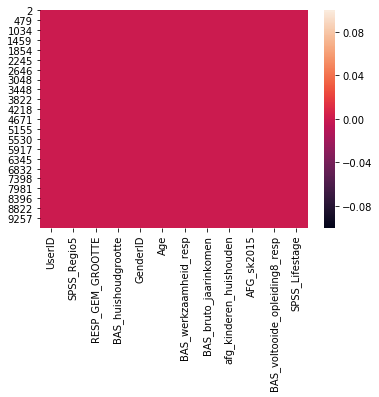

In [58]:
import seaborn as sn
from matplotlib import pyplot as py
sn.heatmap(users_data_DropNa.isna())

In [62]:
for i in list(users_data.columns):
    if i!= 'UserID':
        print(i)

SPSS_Regio5
RESP_GEM_GROOTTE
BAS_huishoudgrootte
GenderID
Age
BAS_werkzaamheid_resp
BAS_bruto_jaarinkomen
afg_kinderen_huishouden
AFG_sk2015
BAS_voltooide_opleiding8_resp
SPSS_Lifestage


In [64]:
j=list(users_data['SPSS_Regio5'].unique())
j

[nan, 5.0, 3.0, 4.0, 2.0, 1.0]

In [66]:
i

'SPSS_Regio5'

# Main

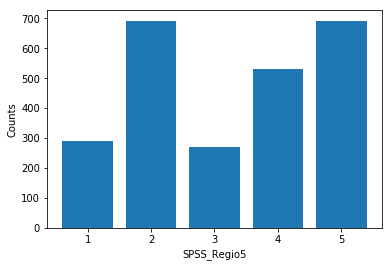

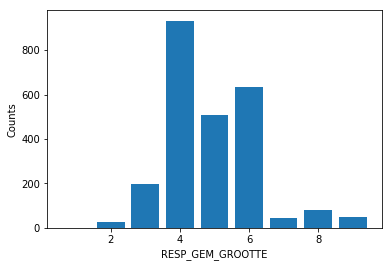

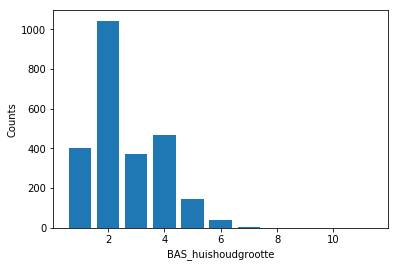

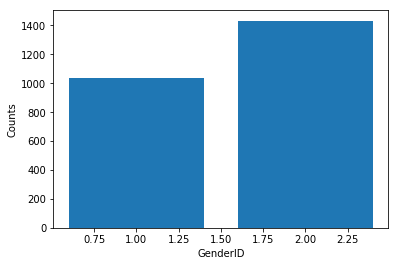

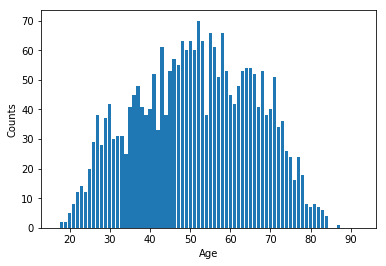

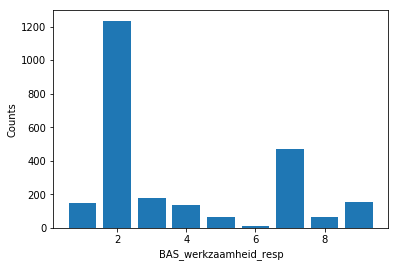

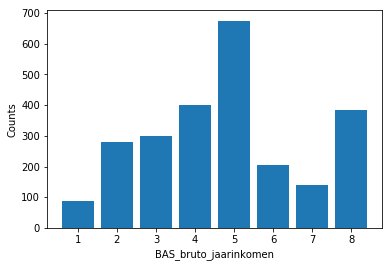

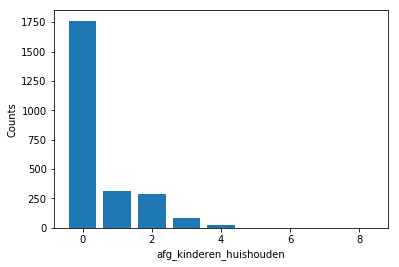

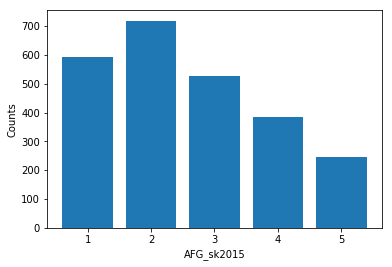

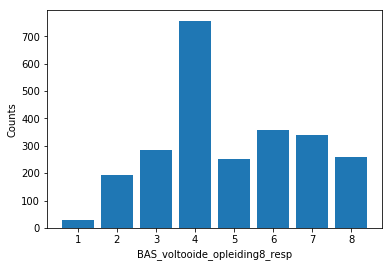

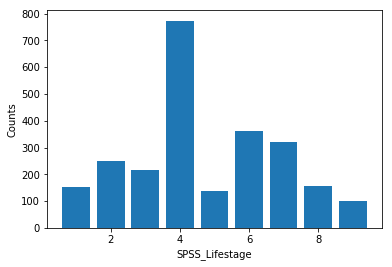

In [96]:
#travel_data=pd.read_csv('TravelData.csv')
#users_data=pd.read_csv('TravelDataDemos.csv')
travel_data_converg=travel_data[(travel_data['purchase_any']==1) & (travel_data['type_touch'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]))]
travel_data_converg
users_data_DropNa=users_data
users_data_DropNa=users_data_DropNa.dropna()
users_data_DropNa=users_data_DropNa[users_data_DropNa['SPSS_Lifestage']!=97]
users_data_DropNa=users_data_DropNa[users_data_DropNa['BAS_werkzaamheid_resp']!=97]

Travel_Cust_Merg=travel_data_converg.merge(users_data_DropNa,left_on='UserID',right_on='UserID')
for i in list(users_data_DropNa.columns):
    if i!= 'UserID':
        j=list(users_data_DropNa[i].unique())
        ls=[]
        for k in j:
            count_Travel_Cust_1=len(Travel_Cust_Merg[Travel_Cust_Merg[i]==k]['UserID'].unique())
            ls.append(count_Travel_Cust_1)
        X=j
        Y=ls
        from matplotlib import pyplot as plt
        #plt.title('CIC VS FIC')
        plt.xlabel(i)
        plt.ylabel('Counts')
        plt.bar(X,Y)
        #plt.xticks()
        plt.show()

In [95]:
j

[nan, 2.0, 4.0, 6.0, 8.0, 5.0, 1.0, 7.0, 3.0, 9.0, 97.0]

In [81]:
Travel_Cust_Merg[Travel_Cust_Merg['SPSS_Lifestage']==97]

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,...,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage


<BarContainer object of 9 artists>

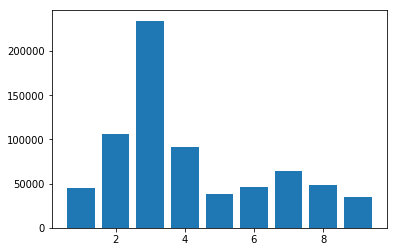

In [92]:
x=list(Travel_Cust_Merg['SPSS_Lifestage'].unique())
y=list(Travel_Cust_Merg.groupby('SPSS_Lifestage').count()['UserID'])
plt.bar(x,y)

In [91]:
list(Travel_Cust_Merg.groupby('SPSS_Lifestage').count()['UserID'])

[46655, 48848, 64283, 234279, 38275, 90991, 106634, 45121, 34528]

In [ ]:
count_Travel_Cust_Male=len(Travel_Cust_Merg[Travel_Cust_Merg['GenderID']==1]['UserID'].unique())
count_Travel_Cust_Female=len(Travel_Cust_Merg[Travel_Cust_Merg['GenderID']==2]['UserID'].unique())
X=['Customer','Firm']
Y=[count_customer,count_firm]
from matplotlib import pyplot as plt
plt.title('CIC VS FIC')
plt.xlabel('Group')
plt.ylabel('Counts')
plt.bar(X,Y)

# Can a firm-initiated contact make customers who have engaged in customer-initiated contacts with competitors, make them shift consideration?

In [105]:
travel_data.iloc[0]

UserID                         9558
PurchaseID                        1
TIMESPSS        2016-03-12 22:18:34
Duration                      5.786
DEVICE_TYPE                  MOBILE
type_touch                        7
purchase_own                      0
purchase_any                      0
MobilePanel                       0
FixedPanel                        0
Name: 0, dtype: object

In [164]:
for j in range(0,len(df[df['UserID']==i])):
        df.where((df.iloc[j]['type_touch'] in ([18,19,20,21,22])) and (df.iloc[j]['purchase_any']==1),ls_true.append(i))
        ls_true.append(i)
            #else:
                #ls_false.append(i)

ValueError: Array conditional must be same shape as self

In [183]:
ls_id=[]
ls_true=[]
ls_false=[]
le=list(travel_data['UserID'])
ls_id=list(travel_data['UserID'].unique())
for i in ls_id:
    df=travel_data[travel_data['UserID']==i]
    df.reset_index(inplace=True)
    ls_f=[]
    if df.iloc[0]['type_touch'] in ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]):
        
        for j in range(0,len(df[df['UserID']==i])):
            if ((df['type_touch'][j] in([18,19,20,21,22])) and (df['purchase_any'][j] in([1]))):
                ls_true.append(i)
            else:
                ls_false.append(i)
count_true=len(ls_true)  
count_false=len(ls_false)

from matplotlib import pyplot as plt
x=['True','False']
y=[count_true,count_false]
plt.bar(x,y)
plt.show

KeyboardInterrupt: 

In [180]:
i

4864

In [181]:
len(df[df['UserID']==i])

0

In [108]:
df=travel_data[travel_data['UserID']==1]
df.reset_index(inplace=True)

In [153]:
len(df[df['UserID']==8561])

1580

In [171]:
#when

In [122]:
if (df['type_touch'].isin ([18,19,20,21,22]) and (df['purchase_any']==1)):
    print('True')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [123]:
df['purchase_any']==1

0    False
1    False
2    False
Name: purchase_any, dtype: bool

In [125]:
df['type_touch'].isin ([18,19,20,21,22])

0    False
1    False
2    False
Name: type_touch, dtype: bool

In [136]:
df.iloc[3]['type_touch'] in ([18,19,20,21,22]) and (df.iloc[3]['purchase_any']==1)

IndexError: single positional indexer is out-of-bounds

In [138]:
df.head()

,index,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel
0,0,9558,1,2016-03-12 22:18:34,5.786,MOBILE,7,0,0,0,0
1,1,9558,1,2016-03-13 05:25:49,65.725,MOBILE,7,0,0,0,0
2,2,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,0,0,0,0


In [224]:
count_true=len(list(set(ls_true)))  
count_false=len(list(set(ls_false)))

<function matplotlib.pyplot.show(*args, **kw)>

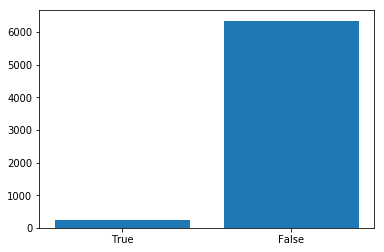

In [225]:
from matplotlib import pyplot as plt
x=['True','False']
y=[count_true,count_false]
plt.bar(x,y)
plt.show

In [216]:
ls_id=[]
ls_true=[]
ls_false=[]
le=list(travel_data['UserID'])
ls_id=list(travel_data['UserID'].unique())
for i in ls_id:
    df=travel_data[travel_data['UserID']==i]
    df.reset_index(inplace=True)
    ls_f=[]
    if df.iloc[0]['type_touch'] in ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]):
        for j in range(0,len(df['UserID'])):
            if ((df.iloc[j]['type_touch'] in ([18,19,20,21,22])) and (df.iloc[j]['purchase_any'] in ([1]))):
                ls_true.append(i)
            else:
                ls_false.append(i)


KeyboardInterrupt: 

In [ ]:
count_true=len(list(set(ls_true)))  
count_false=len(list(set(ls_false)))

list_true=list(set(ls_true))
list_false=list(set(ls_false))


for i in list_true:
    



In [212]:
j=1
df.iloc[0:1]['type_touch'].isin ([18,19,20,21,22])

0    False
Name: type_touch, dtype: bool

In [223]:
lf=list(set(ls_true))
len(lf)

226